# PHASE 2 PROJECT

Student name : Elsie Kiprop
    

## Business Understanding

A number of factors influence the pricing of houses. These factors range from the size of the house to the number of bedrooms and bathrooms among many other determinants. These factors are very important to consider when purchasing or selling a home.

A real estate agency wants to provide advisory services to homeowners selling their homes and to those seeking to buy homes. The real estate agency wants to make sure that those selling their homes sell for a worthy price. The also want to find the best deal for those buying homes depending on the specifications they would love. This will also ensure that home buyers have the proper budget in order to find the home of their liking. 

To be able to come up with accurate and optimal advice for their clients, an analysis on King County Sales data set will be carried out. This will help the real estate agency to have a clear picture on what factors affect the house prices and by what magnitude.

## Objective

To find out the factors that affect house prices and by how much.

## Data Understanding 

The dataset to be used is found in ```kc_house_data.csv```. The data is from house prices in King County.

Below is the data description:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Loading the dataset

The data set that will be used in this case will be ```kc_house_data.csv```

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [2]:
#Loading the data and looking at the first five rows of the data.
housing_data = pd.read_csv('kc_house_data.csv')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Looking at the data types within the data set
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Cleaning the Dataset

In this section we will be cleaning the data. The first step is to deal with the missing values.

### Dealing with the missing values.

In [4]:
#Inspecting the missing values

housing_data.isnull().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the above we can see that there are three columns that contain missing data. They include:
* ```waterfront```
* ```view```
* ```yr_renovated```

In [5]:
#Dealing with the missing data in yr_renovated.
#We will first check the value counts to see where most of the data lies
housing_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We will drop ```yr_renovated``` as majority of the data falls under zero hence providing us with little information.

In [6]:
#Dropping yr_renovated
housing_data.drop(columns=['yr_renovated'], inplace=True)

Since ```view``` contains only 63 missing values, we can replace those values with its mean

In [7]:
#Replacing missing values with median in the view column
mean= np.mean(housing_data['view'])
housing_data['view'].fillna(mean, inplace=True)

In [8]:
#Inspecting the waterfront column.
housing_data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

There are 2 categories in ```waterfront```. Either 0 or 1. Therefore we can fill the missing values with zero since majority take 0.

In [9]:
# Filling waterfront missing values
housing_data['waterfront'].fillna(0,inplace=True)

In [10]:
#Confirming that we no longer haver missing data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Checking for duplicates

In [11]:
housing_data.duplicated().sum()

0

There are no duplicates in our data

### Dropping some variables

We will not need the ```id``` column and the ```date``` columns therefore we can drop them from the dataset

In [12]:
#Dropping the columns

housing_df=housing_data.drop(columns=['id','date']).copy()
housing_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


## Exploratory Data Analysis (EDA)

The first thing to check under EDA is the descriptive statistics

### Descriptive Statistics

The descriptive statistics will show the means, maximum values,minimum values, percentiles, standard deviation and counts of each of the variables.

In [13]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764569,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Assumptions for linear regression. 

Under EDA, we will also explore our data to see whether it meets the assumption of linear regression which are:
* No multicollinearity
* Distribution of the variables should be normal
* Linear relationship between independent and dependent variables.


### Checking the distributions of the variables

To check whether the distributions of the variables are normal, we will plot histograms for each.

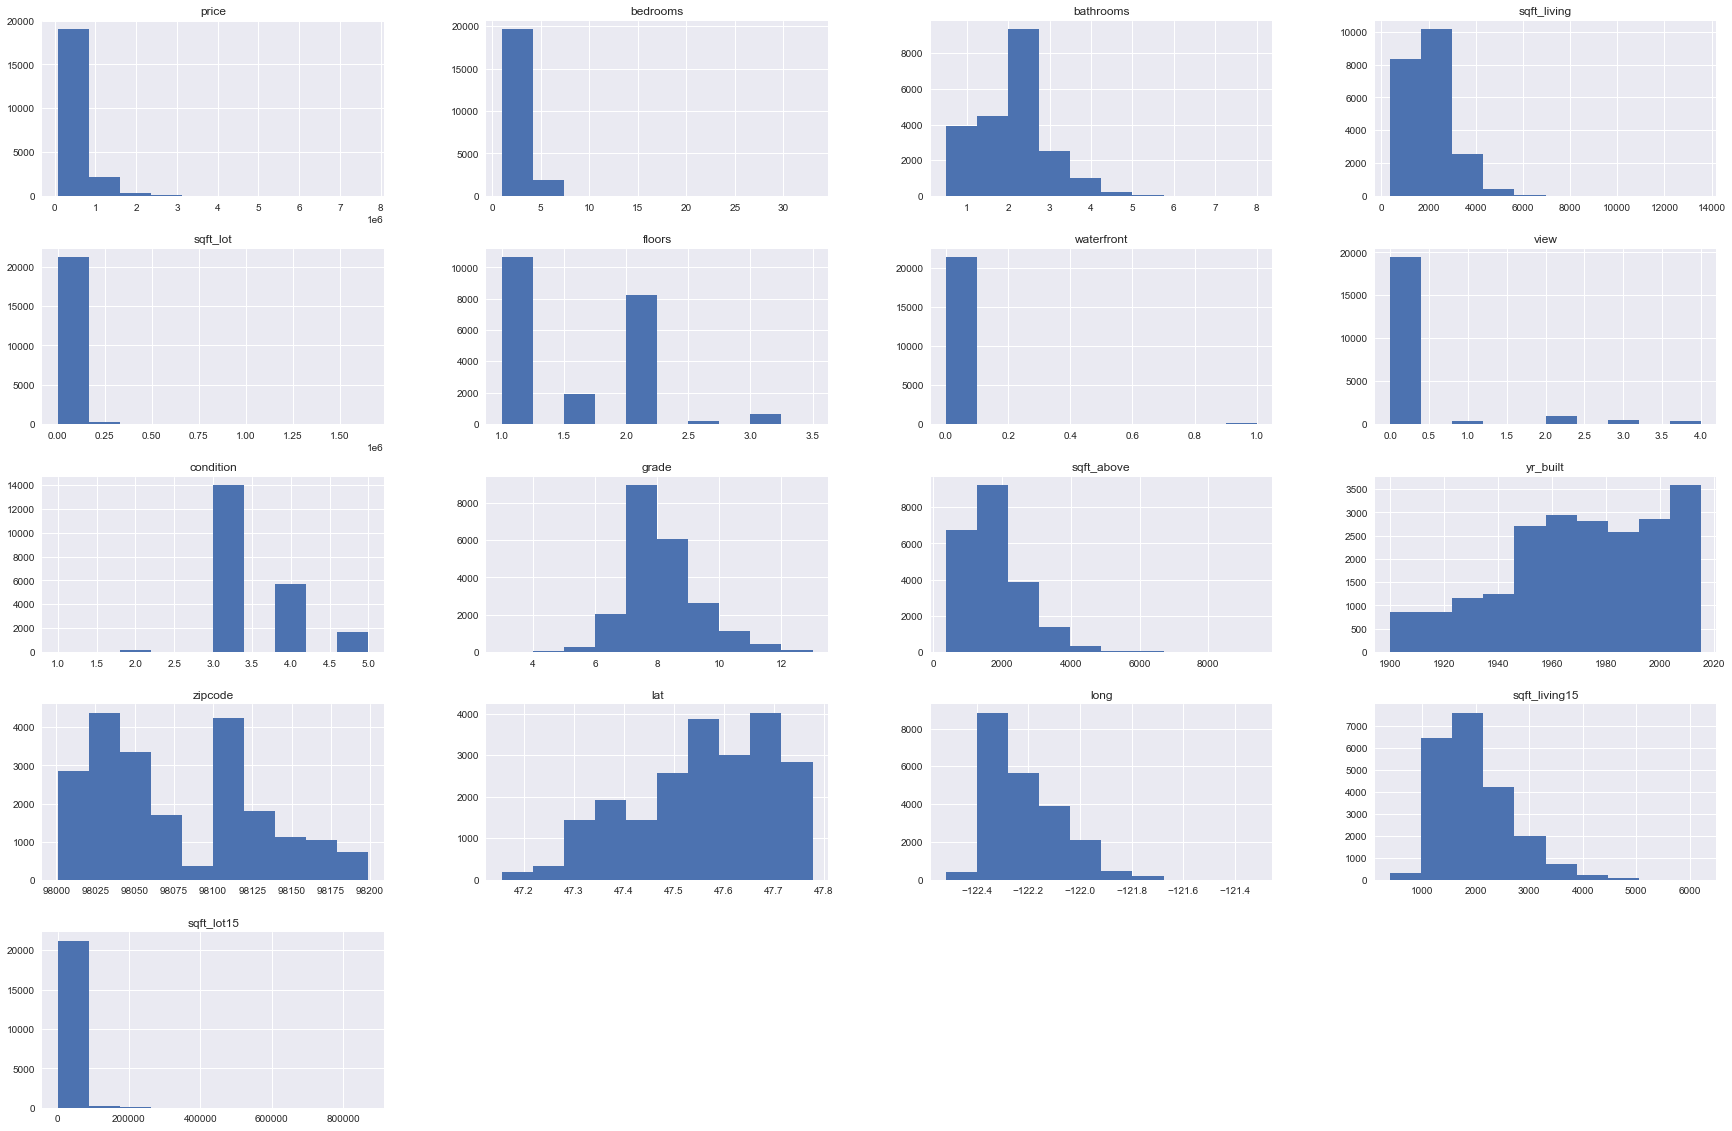

In [14]:
housing_df.hist(figsize = (30,20));

From the above histograms, it is quite clear that most of these variables are not normally distributed and most of them are skewed. Most of them are skewed. However ```grade``` seems to have a slight normal distribution.

From both the histogram  we can see that ```waterfront``` has most values falling under zero so it won't have a big effect on the ```price```. We can therefore drop it. This is also the same case for ```view```

In [15]:
#Dropping waterfront and view

KC_data=housing_df.drop(columns=['view', 'waterfront']).copy()
KC_data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Checking for linearity 

To check for linearity between the dependent and independent variables we will use scatter plots.
The dependent variable is ```price``` while the rest are the independent variables.

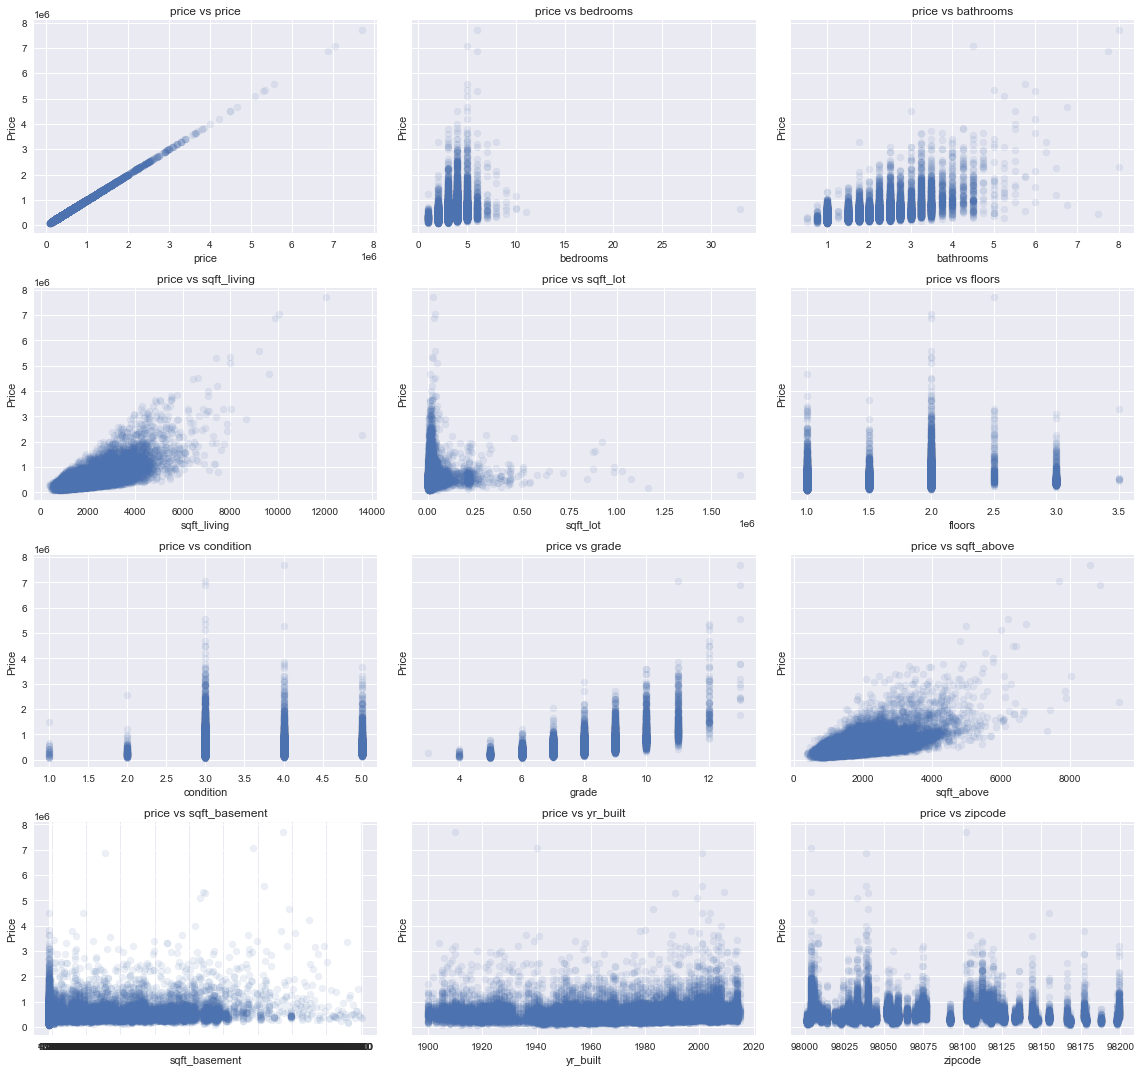

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(),KC_data.columns):
    ax.scatter(KC_data[column], KC_data['price'] , label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

fig.tight_layout()

The following variables have a linear relationship with price:
* sqft_above
* bedrooms
* sqft_living
* sqft_living15
* bathrooms


On the other hand, ```lat``` , ```long``` , ```yr_built``` , ```sqft_basement``` and ```zipcode``` do not have a linear relationship with ```price``` at all
We could go ahead and drop these columns.

In [17]:
Data=KC_data.drop(columns=['lat', 'long', 'sqft_basement','zipcode','yr_built']).copy()
Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8,1530,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,3,8,2310,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,3,7,1020,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,3,8,1600,1410,1287


### Checking for multicollinearity

To check for mulricollinearity, which is the correlation between independent variables, we will plot a heat map.

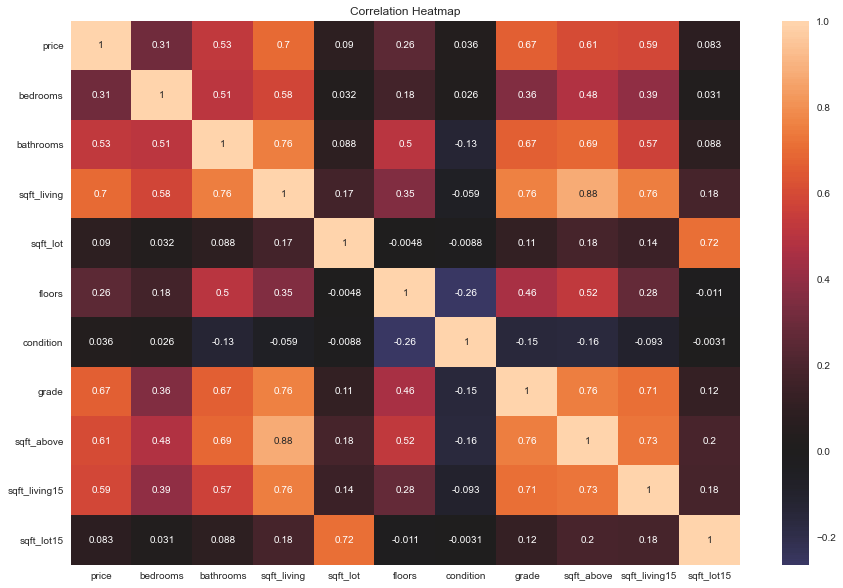

In [18]:
correlation_matrix = Data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, center = 0, annot = True)
plt.title('Correlation Heatmap')
plt.show()

From the above heatmap, there is multicollinearity between the following variables:
* ```sqft_living15``` and ```sqft_living```
* ```sqft_living15``` and ```sqft_above```
* ```sqft_lot``` and ```sqft_lot15```
* ```grade``` and ```sqft_living15```
* ```grade``` and ```sqft_living```
* ```bathrooms``` and ```sqft_living```
* ```grade``` and ```sqft_above```
 
The following variables are highly correlated with price:
*  ```grade```
* ```sqft_above```
* ```sqft_living15```
* ```sqft_living```
* ```bathrooms```

Generally collinearity coeffecients between independent variables shouldn't be higher than 0.7 . To solve the multicollinearity problem in our data, we will have to drop some of the variables. 

In [19]:
#Dropping some columns to fix the problem of muticollinearity.
df=Data.drop(columns=['sqft_living15', 'sqft_lot15', 'grade','bathrooms']).copy()
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_above
0,221900.0,3,1180,5650,1.0,3,1180
1,538000.0,3,2570,7242,2.0,3,2170
2,180000.0,2,770,10000,1.0,3,770
3,604000.0,4,1960,5000,1.0,5,1050
4,510000.0,3,1680,8080,1.0,3,1680


### Findings from EDA

From the Exploratory Data Analysis we have found that most of the variables are not normally distributed. Therefore the next step we will take is to normalize our data.
We have since dropped some variables therefore we will deal with the remaining columns.

#### Normalising the data

We will carry out a log transormation

In [20]:
df_log = pd.DataFrame([])

df_log['floors'] = df['floors']
df_log['condition'] = df['condition']
df_log['price'] = np.log(df['price'])
df_log['sqft_living'] = np.log(df['sqft_living'])
df_log['sqft_lot'] = np.log(df['sqft_lot'])
df_log['bedrooms'] = np.log(df['bedrooms'])
df_log['sqft_above'] = np.log(df['sqft_above'])


df_log.head()

,floors,condition,price,sqft_living,sqft_lot,bedrooms,sqft_above
0,1.0,3,12.309982,7.073270,8.639411,1.098612,7.073270
1,2.0,3,13.195614,7.851661,8.887653,1.098612,7.682482
2,1.0,3,12.100712,6.646391,9.210340,0.693147,6.646391
3,1.0,5,13.311329,7.580700,8.517193,1.386294,6.956545
4,1.0,3,13.142166,7.426549,8.997147,1.098612,7.426549


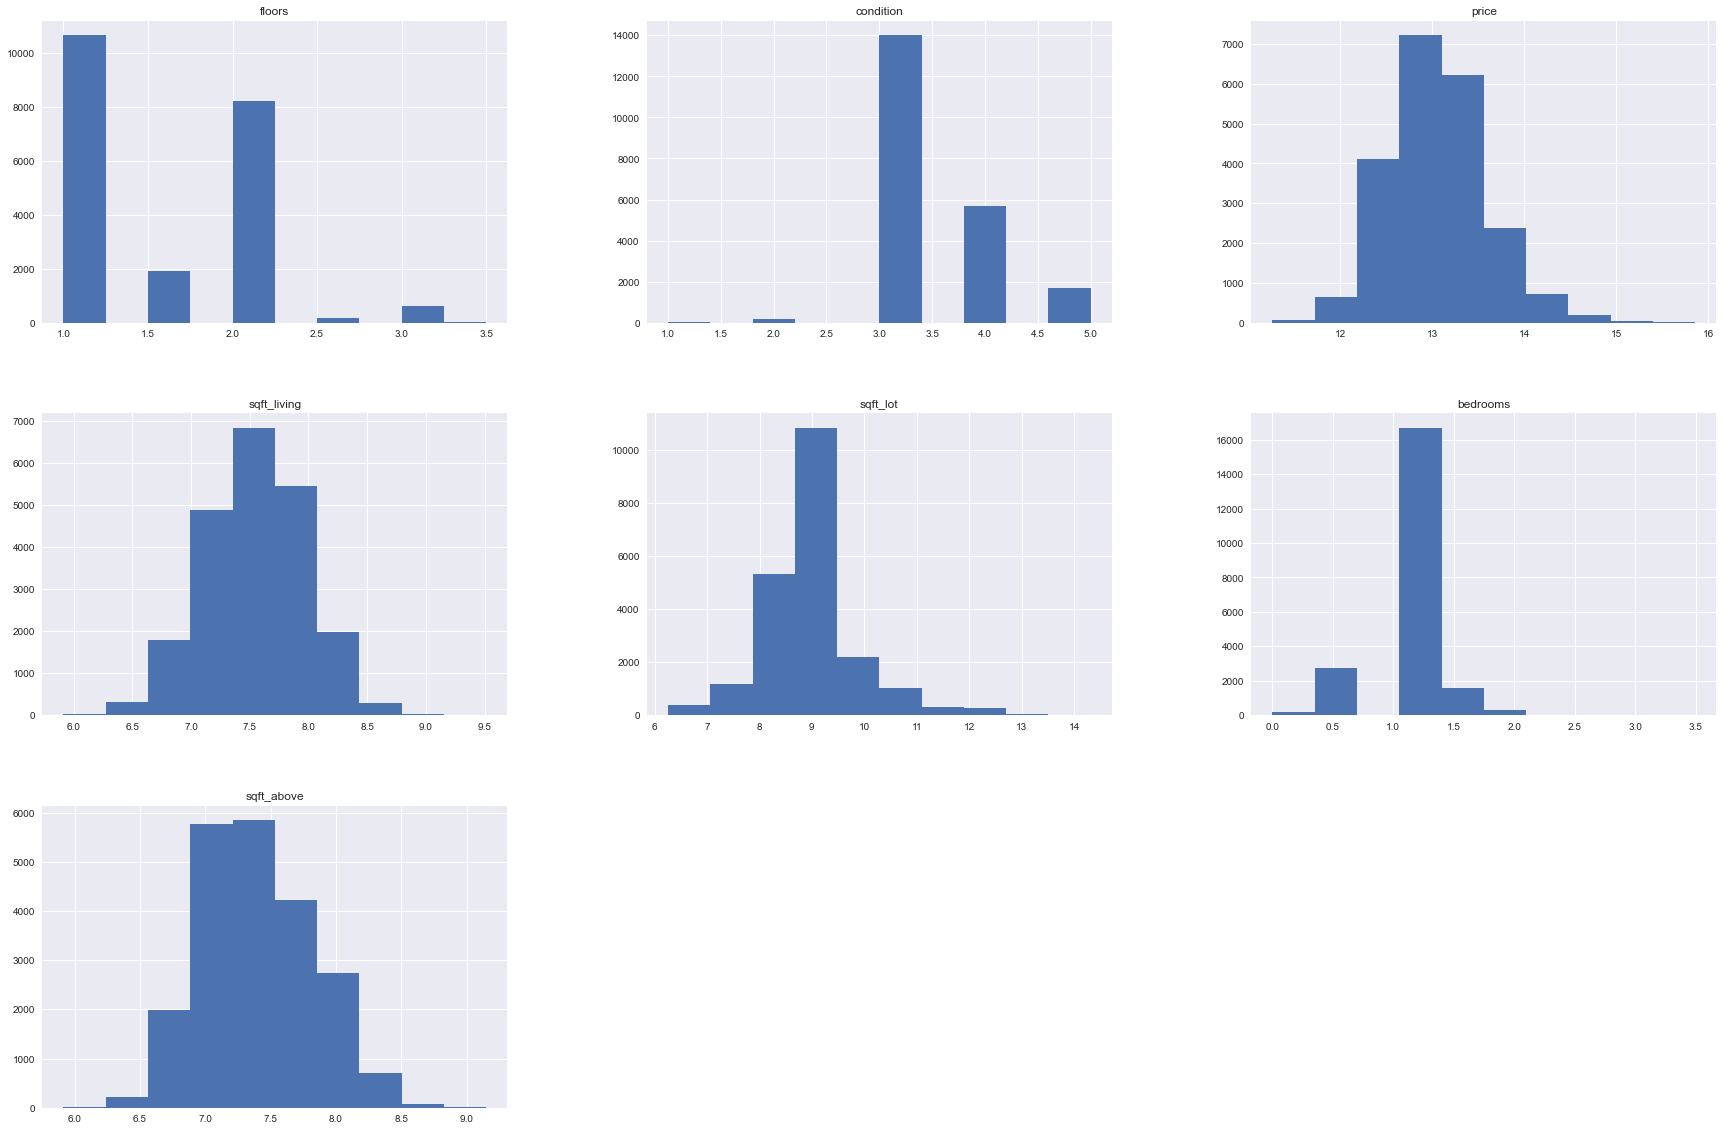

In [21]:
#Checking whether our data is now normal.
df_log.hist(figsize = (30,20));

Our data now looks better.Most of the variables now seem to be normally distributed.

#### One Hot Encoding

In our data the categorical variable is condition.To deal with categorical variables we will carry out one hot encoding. It ranges from 1 to 5 with 5 being the best condition and 1 being the worst condition.

In [22]:
#Creating the dummies
dummies = pd.get_dummies(df_log['condition'])

#Dropping the condition column from the data
Df = df_log.drop(['condition'], axis = 1)

#Adding the conditions to the data frame
data = pd.concat([Df, dummies], axis=1)

#Renaming the columns.
data = data.rename({1:'Cond_1',  2:'Cond_2', 3: 'Cond_3', 4: 'Cond_4',  5:'Cond_5'}, axis=1)
data.head()

,floors,price,sqft_living,sqft_lot,bedrooms,sqft_above,Cond_1,Cond_2,Cond_3,Cond_4,Cond_5
0,1.0,12.309982,7.073270,8.639411,1.098612,7.073270,0,0,1,0,0
1,2.0,13.195614,7.851661,8.887653,1.098612,7.682482,0,0,1,0,0
2,1.0,12.100712,6.646391,9.210340,0.693147,6.646391,0,0,1,0,0
3,1.0,13.311329,7.580700,8.517193,1.386294,6.956545,0,0,0,0,1
4,1.0,13.142166,7.426549,8.997147,1.098612,7.426549,0,0,1,0,0


### Checking for multicollinearity in our cleaned data.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   floors       21597 non-null  float64
 1   price        21597 non-null  float64
 2   sqft_living  21597 non-null  float64
 3   sqft_lot     21597 non-null  float64
 4   bedrooms     21597 non-null  float64
 5   sqft_above   21597 non-null  float64
 6   Cond_1       21597 non-null  uint8  
 7   Cond_2       21597 non-null  uint8  
 8   Cond_3       21597 non-null  uint8  
 9   Cond_4       21597 non-null  uint8  
 10  Cond_5       21597 non-null  uint8  
dtypes: float64(6), uint8(5)
memory usage: 1.1 MB


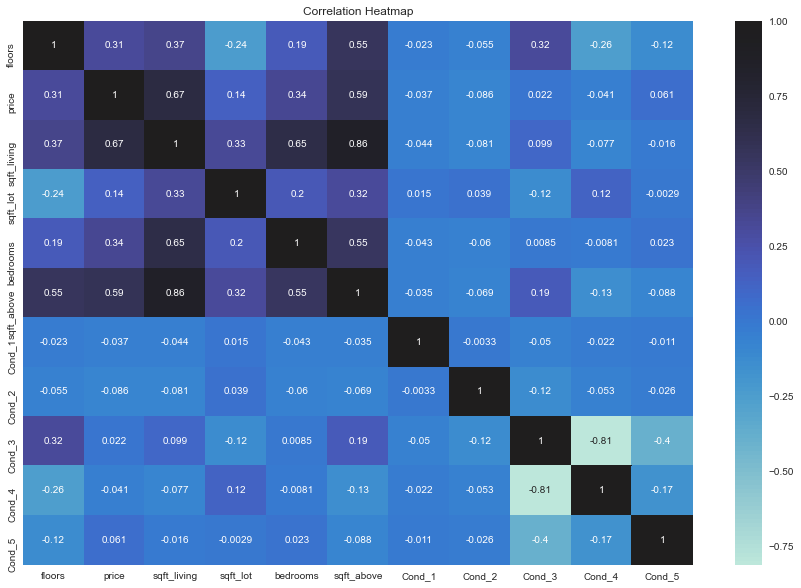

In [24]:
correlation_matrix = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, center = 1, annot = True)
plt.title('Correlation Heatmap')
plt.show()

From the correlation matrix above, we can see that ```sqft_living``` and ```sqft_above``` are correlated so we will drop one of them.


In [25]:
# Dropping sqft_above
KC=data.drop(columns=['sqft_above']).copy()
KC.head()

,floors,price,sqft_living,sqft_lot,bedrooms,Cond_1,Cond_2,Cond_3,Cond_4,Cond_5
0,1.0,12.309982,7.073270,8.639411,1.098612,0,0,1,0,0
1,2.0,13.195614,7.851661,8.887653,1.098612,0,0,1,0,0
2,1.0,12.100712,6.646391,9.210340,0.693147,0,0,1,0,0
3,1.0,13.311329,7.580700,8.517193,1.386294,0,0,0,0,1
4,1.0,13.142166,7.426549,8.997147,1.098612,0,0,1,0,0


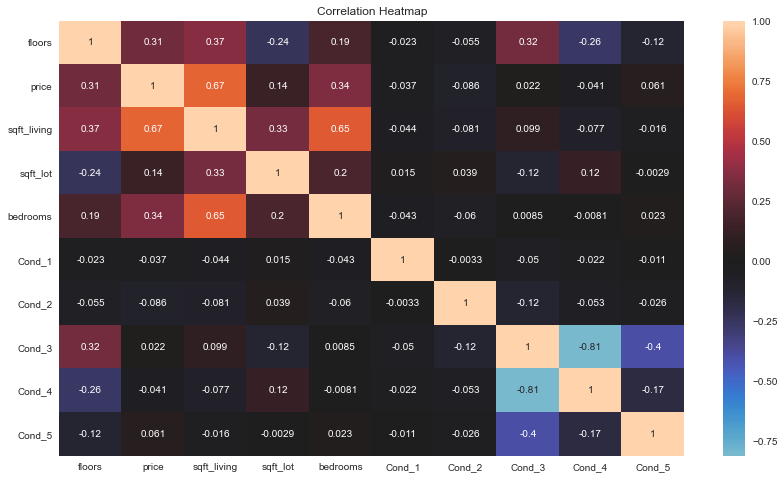

In [26]:
#Checking for multicollinearity after droppinf sqft_above
correlation_matrix = KC.corr()
plt.figure(figsize = (14,8))
sns.heatmap(correlation_matrix, center = 0, annot = True)
plt.title('Correlation Heatmap')
plt.show()

### Variables that are highly correlated with price

In [27]:
corr_with_price= KC.corr()['price'].map(abs).sort_values(ascending= False)
corr_with_price

price          1.000000
sqft_living    0.674802
bedrooms       0.342850
floors         0.310630
sqft_lot       0.138261
Cond_2         0.086095
Cond_5         0.061148
Cond_4         0.040810
Cond_1         0.037285
Cond_3         0.021932
Name: price, dtype: float64

From the above we can see how the variables are correlated with price beginning with the variable with the highest correlation with price to the lowest.
```sqft_living``` has the highest correlation with price followed by ```bedrooms```. Footage of the home seems to largely determine the house prices. We will see by how much in the modelling section.

## Modelling

Now that we have preprocessed the data, we can go ahead and do some modelling.
We will begin with a very basic model as we proceed to other models.
It is important to remember that throughout the modelling, ```price``` is out target variable

### Simple linear regression model

We will begin with simple linear regression modelling and we will examine the factors that are highly correlated with price. Si As mention earlier, they include: ```floors```, ```sqft_living``` and ```bedrooms``` . Simple linear regression models usually include one target variable and one explanatory variable. We will also create visualizations for each of the simple linear regression models.

#### Price Vs Floors

In [28]:
#Importing the relevant libraries.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [29]:
#Fitting the model
formula1 = 'price~floors'
floors_model = smf.ols(formula=formula1, data=KC).fit()
floors_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2306.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:02   Log-Likelihood:                -15696.
No. Observations:               21597   AIC:                         3.140e+04
Df Residuals:                   21595   BIC:                         3.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5954      0.010   1256.346      0.000      12.576      12.615
floors         0.3031      0.006     48.023      0.000       0.291       0.315
==============================================================================
Omnibus:                      836.437   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1031.279
Skew:                           0.437   Prob(JB):                    1.15e-224
Kurtosis:                       3.618   Cond. No.                         6.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

findfont: Font family ['sans_serif'] not found. Falling back to DejaVu Sans.


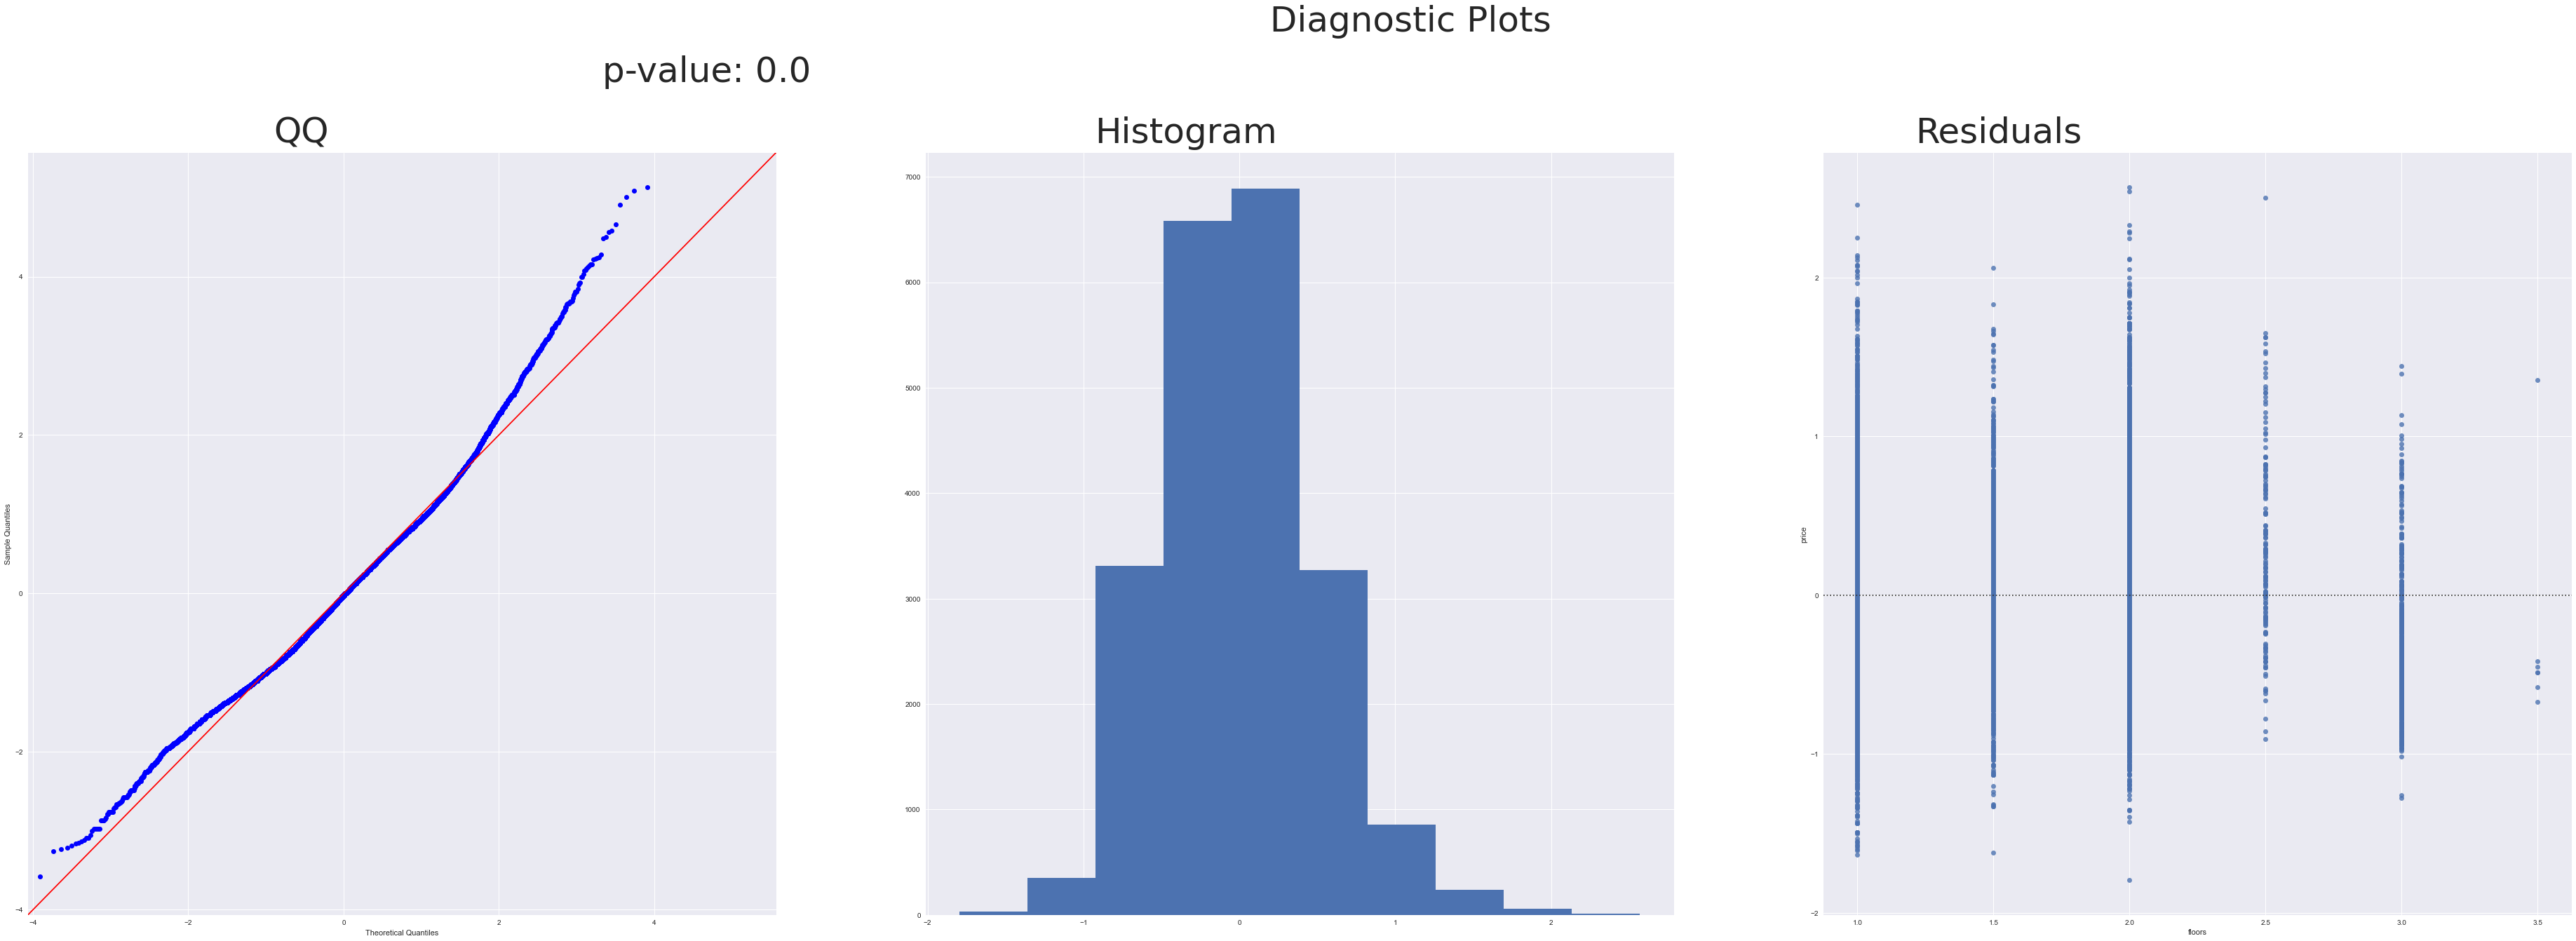

In [30]:
residuals = floors_model.resid
plot = plt.figure()
plot, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
plot.text(s=" Diagnostic Plots",x=0.5,y=1, fontsize=50, fontname='sans_serif')

plot.text(s="p-value: {p}".format(p= floors_model.f_pvalue), x=0.3, y=0.95, fontsize=50, fontname='sans_serif')

plot.text(s='Histogram', x=.45, y=.89, fontsize=50, fontname='sans_serif')

sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])  
plot.text(s='QQ', x=.20, y=.89, fontsize=50, fontname='sans_serif')

plot.text(s='Residuals', x=.70, y=0.89, fontsize=50, fontname='sans_serif')
axes[0][1].hist(residuals)
sns.residplot('floors', 'price', data=KC, ax=axes[0][2])

plt.show()

From the above plots and regression anlaysis, ```floors``` is statistically significant having a p-value below 0.05.
However, from the model summary, the r-squared is too low at 9.6%.
Homoskedasticity of residuals is also evident.
The histogram shows that the residuals are normal

### Price Vs sqft_living

In [31]:
#Fitting the model
formula2 = 'price~sqft_living'
sqft_living_model = smf.ols(formula=formula2, data=KC).fit()
sqft_living_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:04   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7234      0.047    142.612      0.000       6.631       6.816
sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

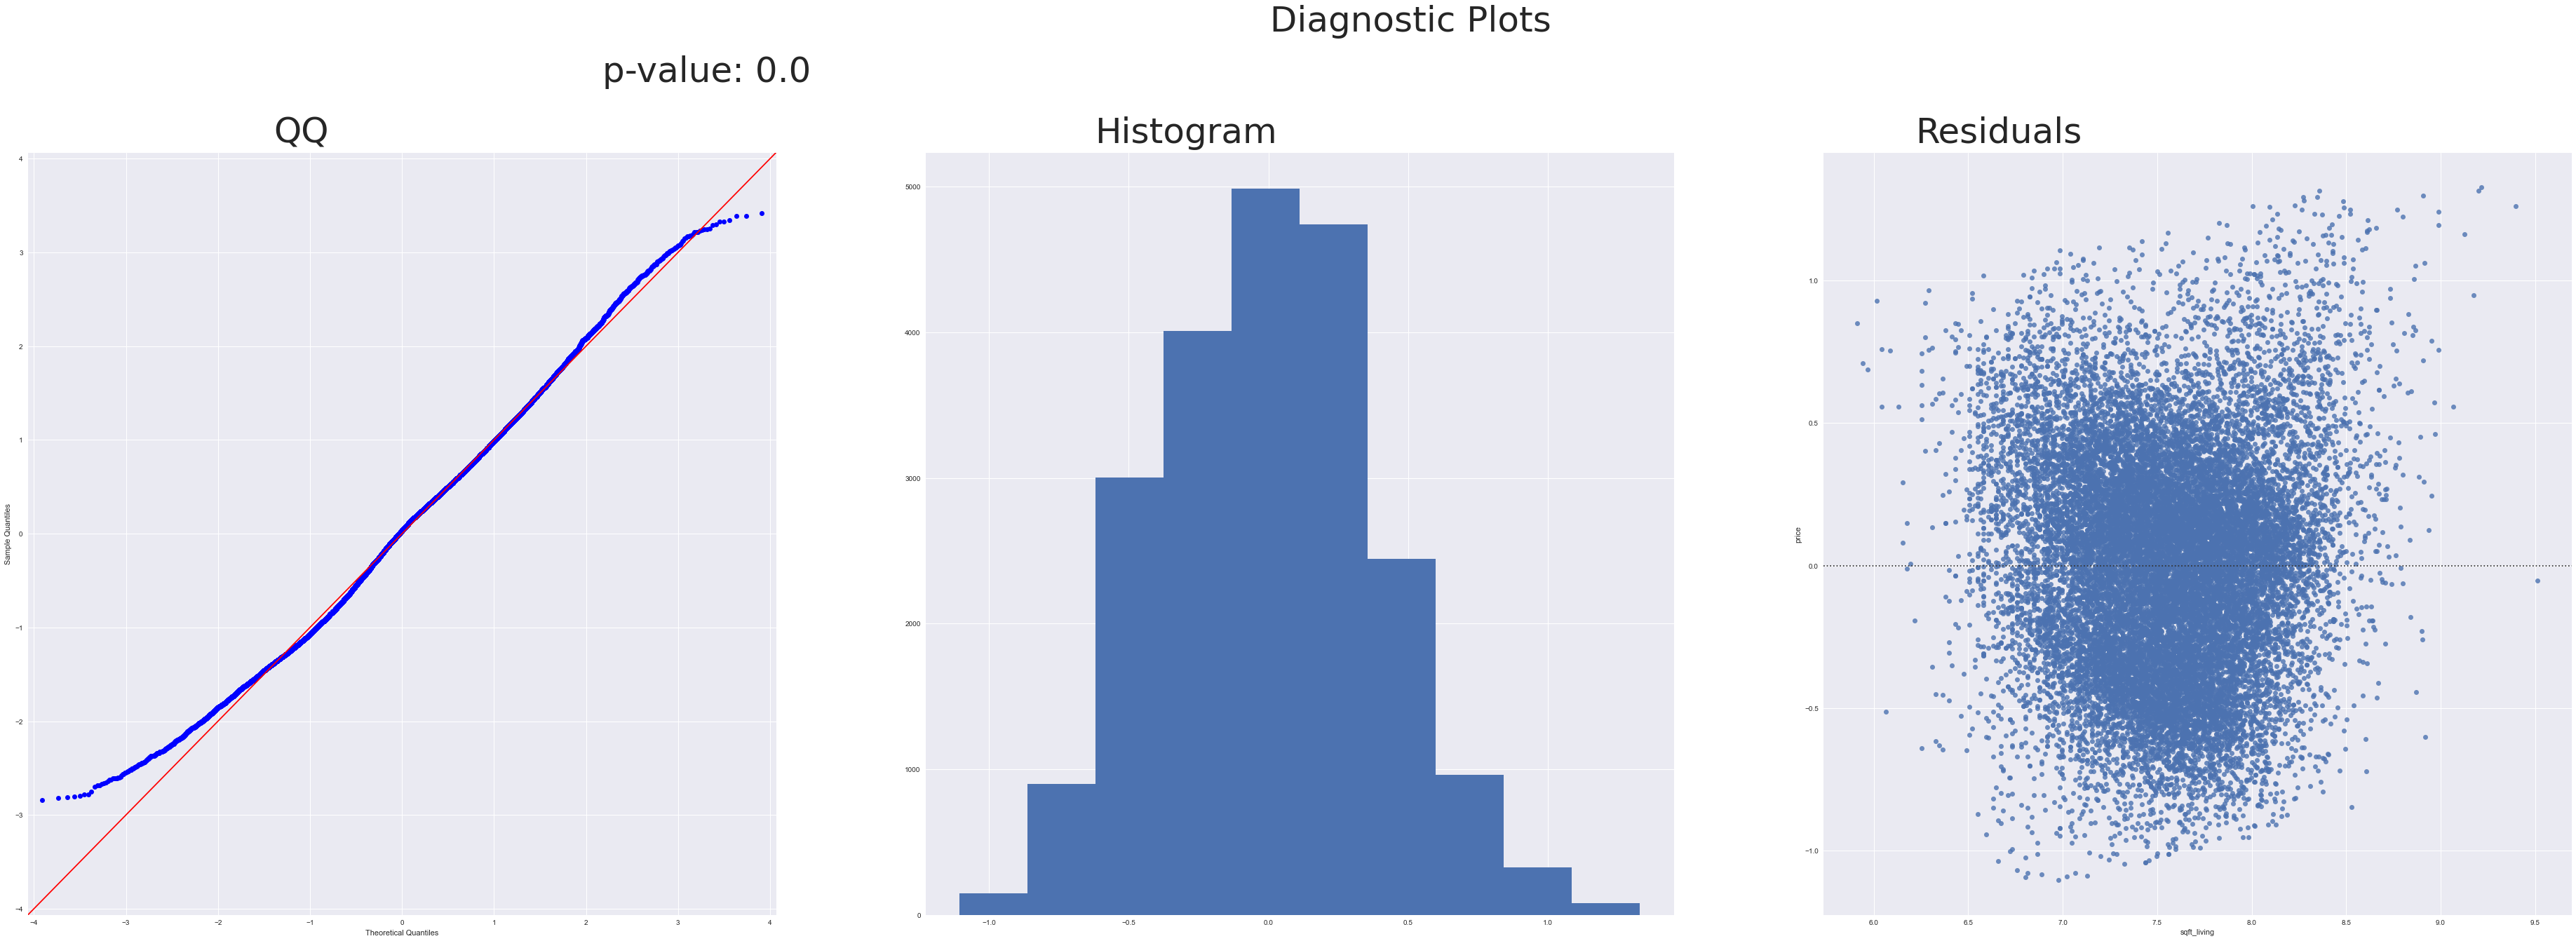

In [32]:
residuals = sqft_living_model.resid
plot = plt.figure()
plot, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
plot.text(s=" Diagnostic Plots",x=0.5,y=1, fontsize=50, fontname='sans_serif')

plot.text(s="p-value: {p}".format(p= sqft_living_model.f_pvalue), x=0.3, y=0.95, fontsize=50, fontname='sans_serif')

plot.text(s='Histogram', x=.45, y=.89, fontsize=50, fontname='sans_serif')

sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])  
plot.text(s='QQ', x=.20, y=.89, fontsize=50, fontname='sans_serif')

plot.text(s='Residuals', x=.70, y=0.89, fontsize=50, fontname='sans_serif')
axes[0][1].hist(residuals)
sns.residplot('sqft_living', 'price', data=KC, ax=axes[0][2])

plt.show()

The distribution of residuals is normal.
The residuals are homoskedastic. The p-value is below 0.05 meaning that ```sqft_living``` is statistically significant.
From the model summary we can see that the r_squared is 45.5%.

### Price Vs bedrooms

In [33]:
formula3 = 'price~bedrooms'
bedrooms_model = smf.ols(formula=formula2, data=KC).fit()
bedrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:05   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7234      0.047    142.612      0.000       6.631       6.816
sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

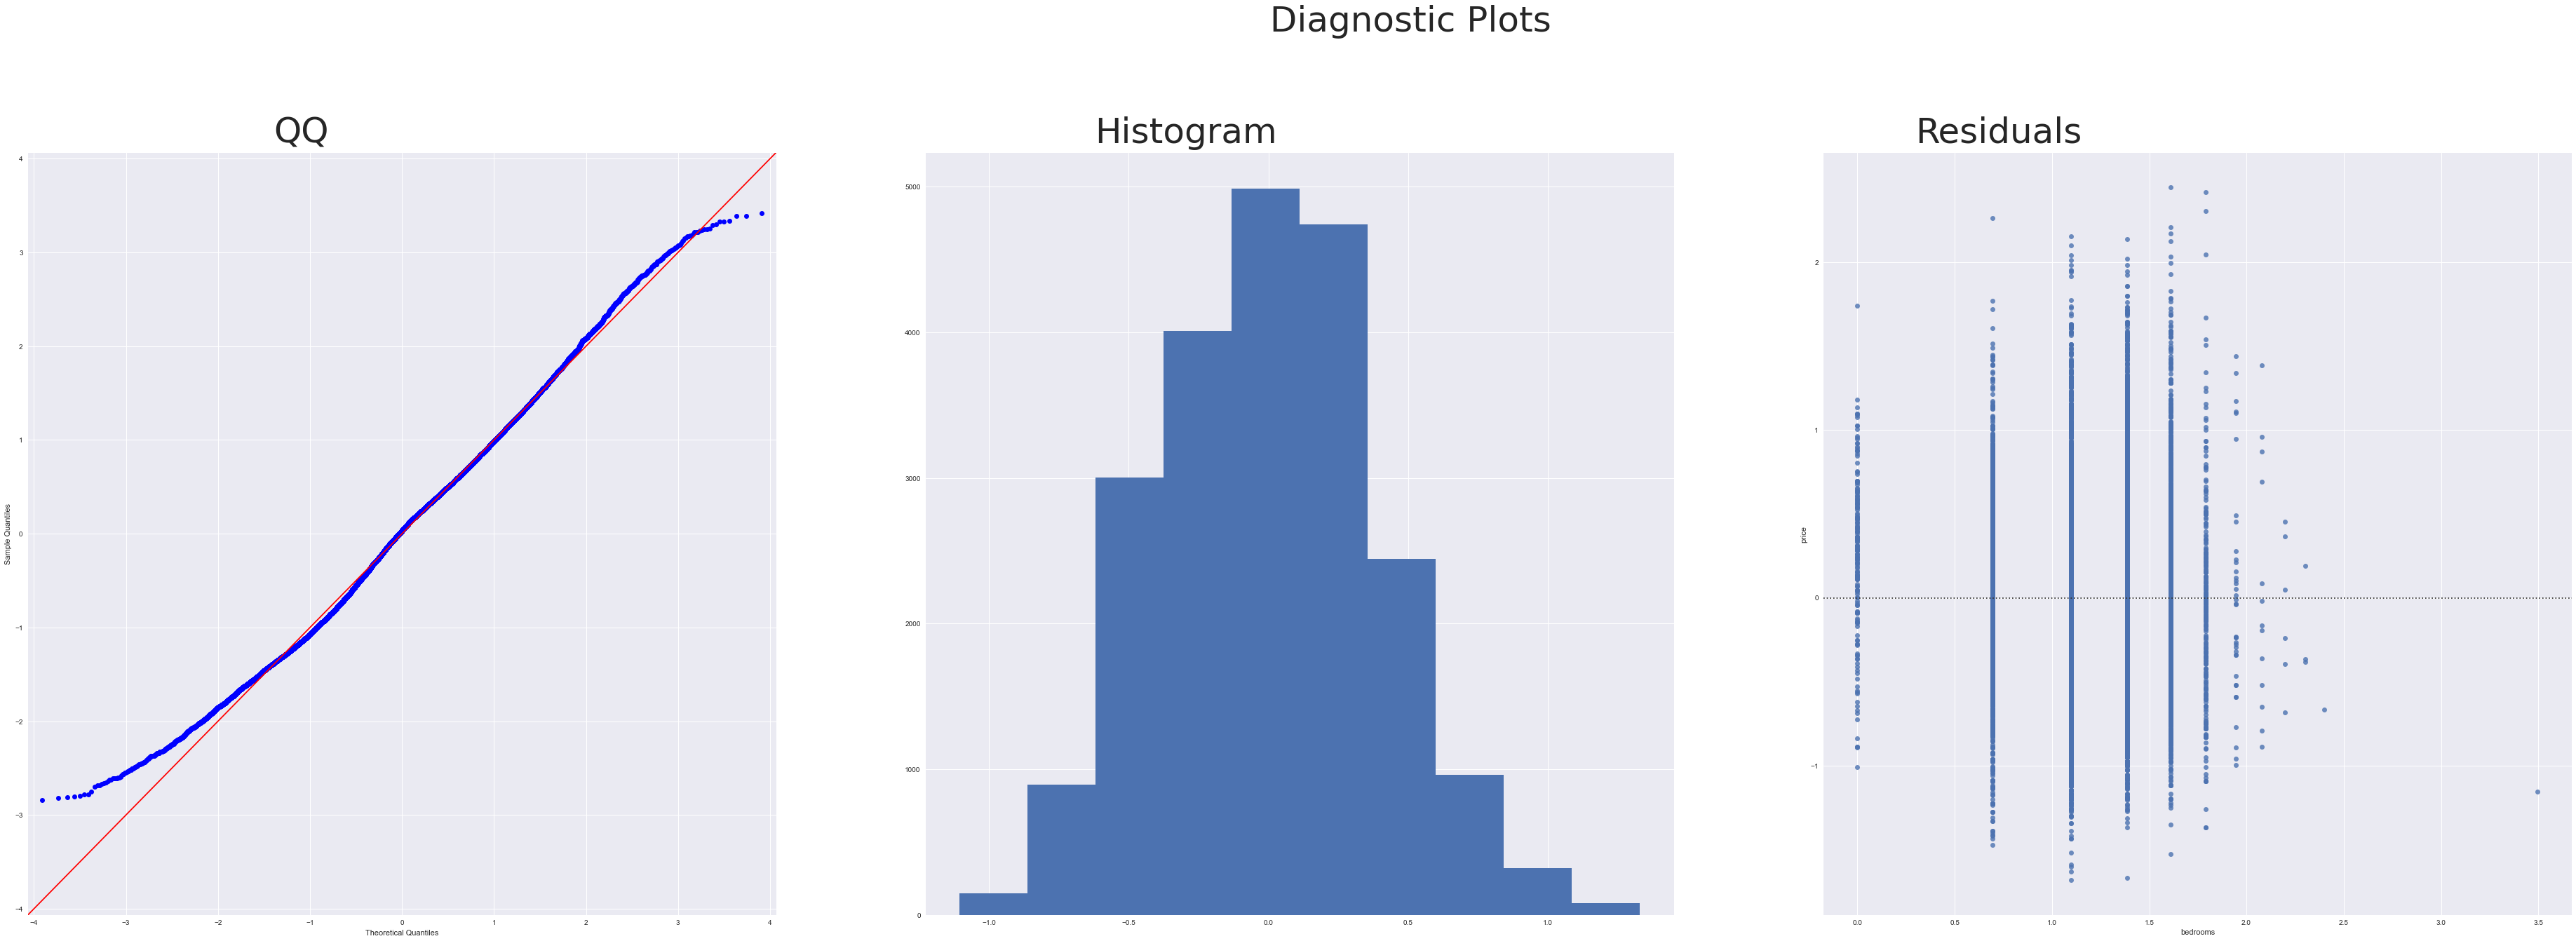

In [34]:
residuals = sqft_living_model.resid
plot = plt.figure()
plot, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
plot.text(s=" Diagnostic Plots",x=0.5,y=1, fontsize=50, fontname='sans_serif')

plot.text(s='Histogram', x=.45, y=.89, fontsize=50, fontname='sans_serif')

sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])  
plot.text(s='QQ', x=.20, y=.89, fontsize=50, fontname='sans_serif')

plot.text(s='Residuals', x=.70, y=0.89, fontsize=50, fontname='sans_serif')
axes[0][1].hist(residuals)
sns.residplot('bedrooms', 'price', data=KC, ax=axes[0][2])

plt.show()

The residuals are normally distributed.
From the regression summary the r-squared is 45.5%.
The p-value is below 0.05 meaning that ```bedrooms``` is statistically significant. The residuals are heteroskedastic.

 ## Multiple Linear Regression.

Multiple regression models invlove one dependent variable and 2 or more independent variables. We will look at a number of models, evaluate each and choose the best and final model.

Before we  model, we will carry out recursive feature selction to see which variables to include in our models.

### Recursive Feature Selection

Recursive Feature selection suggests that we create a models beginning with all the predictive features as we slowly build to a smaller set of predictive features.W will carry ou RFE in order to select the variables to include in the multiple linear regression models.

In [35]:
#Importing the relevant libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [36]:
# Carrying out the feature selection
linear_rfe = LinearRegression()


#We will need to drop price since its the target variable
selection_data = KC.drop(['price'],axis=1)

In [37]:
selection1 = RFE(linear_rfe,n_features_to_select=3)
selection1 = selection1.fit(selection_data,KC['price'])

In [38]:
selection1.ranking_

array([4, 1, 6, 1, 3, 1, 7, 5, 2])

One of the models will include ```sqft_living```, ```bedrooms``` and ```Cond_2``` as the independent variables

In [39]:
selection_data.head()

,floors,sqft_living,sqft_lot,bedrooms,Cond_1,Cond_2,Cond_3,Cond_4,Cond_5
0,1.0,7.073270,8.639411,1.098612,0,0,1,0,0
1,2.0,7.851661,8.887653,1.098612,0,0,1,0,0
2,1.0,6.646391,9.210340,0.693147,0,0,1,0,0
3,1.0,7.580700,8.517193,1.386294,0,0,0,0,1
4,1.0,7.426549,8.997147,1.098612,0,0,1,0,0


In [40]:
selection2 = RFE(linear_rfe,n_features_to_select=4)
selection2 = selection2.fit(selection_data,KC['price'])
selection2.ranking_

array([3, 1, 5, 1, 2, 1, 6, 4, 1])

The other model will include ```sqft_living```, ```bedrooms```,  ```Cond_5``` and  ```Cond_2``` as the independent variables

In [41]:
selection3 = RFE(linear_rfe,n_features_to_select=5)
selection3 = selection3.fit(selection_data,KC['price'])
selection3.ranking_

array([2, 1, 4, 1, 1, 1, 5, 3, 1])

The next model will include ```sqft-living```, ```bedrooms```, ```Cond_1```, ```Cond_2``` and  ```Cond_5```

In [42]:
selection4 = RFE(linear_rfe,n_features_to_select=6)
selection4 = selection4.fit(selection_data,KC['price'])
selection4.ranking_

array([1, 1, 3, 1, 1, 1, 4, 2, 1])

From the selection above, we will also have a model that will include ```floors```, ```bedrrooms```, ```sqft_living```, ```Cond_1```, ```Cond_2```, ```Cond_5```

The models below include the variables selcted using the Recursive Feature Elimination. The first model however, includes all the variables.

### Model One

The first model will include all the variables.
```price ``` remains to be our target variable.

In [43]:
# Fitting the model.
formula = 'price~ bedrooms + floors + sqft_living + sqft_lot + Cond_1 + Cond_2 + Cond_3 + Cond_4 + Cond_5'
model_one = smf.ols(formula=formula, data=KC).fit()
model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     2301.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:09   Log-Likelihood:                -9528.2
No. Observations:               21597   AIC:                         1.908e+04
Df Residuals:                   21587   BIC:                         1.916e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.794e+10   2.78e+10     -0.645      0.519   -7.25e+10    3.66e+10
bedrooms       -0.3171      0.012    -26.556      0.000      -0.340      -0.294
floors          0.0564      0.006      9.705      0.000       0.045       0.068
sqft_living     0.9859      0.009    107.572      0.000       0.968       1.004
sqft_lot       -0.0465      0.003    -14.054      0.000      -0.053      -0.040
Cond_1       1.794e+10   2.78e+10      0.645      0.519   -3.66e+10    7.25e+10
Cond_2       1.794e+10   2.78e+10      0.645      0.519   -3.66e+10    7.25e+10
Cond_3       1.794e+10   2.78e+10      0.645      0.519   -3.66e+10    7.25e+10
Cond_4       1.794e+10   2.78e+10      0.645      0.519   -3.66e+10    7.25e+10
Cond_5       1.794e+10   2.78e+10      0.645      0.519   -3.66e+10    7.25e+10
==============================================================================
Omnibus:                       75.658   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.016
Skew:                           0.141   Prob(JB):                     3.11e-17
Kurtosis:                       2.926   Cond. No.                     3.19e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the above analysis, the r-squared shows that this model explains 49% variations in the prices.However, warning 2 indicates a small eigen value which may hint towards a singularity problem.
Therefore this may not be our final and best model. Therefore,we will go ahead and fit another model.

### Model two

This model will include:  ```floors```, ```sqft_living``` and ```Cond_2```. This is per the recursive feature selection done earlier.

In [44]:
formula = 'price~ bedrooms + floors + Cond_2 '
model_two = smf.ols(formula=formula, data=KC).fit()
model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     1611.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:09   Log-Likelihood:                -14611.
No. Observations:               21597   AIC:                         2.923e+04
Df Residuals:                   21593   BIC:                         2.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0452      0.015    783.468      0.000      12.015      12.075
bedrooms       0.5420      0.012     46.452      0.000       0.519       0.565
floors         0.2458      0.006     40.160      0.000       0.234       0.258
Cond_2        -0.3265      0.037     -8.883      0.000      -0.399      -0.254
==============================================================================
Omnibus:                      699.088   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              814.495
Skew:                           0.410   Prob(JB):                    1.36e-177
Kurtosis:                       3.482   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model has a lower r_squared value, however its better than model 1 as it doesnt pose the singularity problem.
The model explains 18.3 percent of the variations in prices which is too low. It is also statistically significant as it has a p-value below 0.05. Lets create further models to see whether we have better models that this.

### Model Three 

This model will include ```bedrooms```, ```floors```, ```sqft_living``` and ```sqft_lot```

In [45]:
formula = 'price~ bedrooms + floors + Cond_2 + Cond_5 '
model_three = smf.ols(formula=formula, data=KC).fit()
model_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:09   Log-Likelihood:                -14517.
No. Observations:               21597   AIC:                         2.904e+04
Df Residuals:                   21592   BIC:                         2.908e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0245      0.015    781.710      0.000      11.994      12.055
bedrooms       0.5346      0.012     45.970      0.000       0.512       0.557
floors         0.2566      0.006     41.763      0.000       0.245       0.269
Cond_2        -0.3111      0.037     -8.496      0.000      -0.383      -0.239
Cond_5         0.1657      0.012     13.713      0.000       0.142       0.189
==============================================================================
Omnibus:                      700.530   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.912
Skew:                           0.406   Prob(JB):                    1.23e-179
Kurtosis:                       3.505   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model three like model on has a very low r squared value at 19% percent hence it won't be a very good model to use to predict house prices.

### Model Four

In [46]:
formula = 'price~ bedrooms  + sqft_living + Cond_2 + Cond_5 + Cond_1 '
model_four = smf.ols(formula=formula, data=KC).fit()
model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3952.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:09   Log-Likelihood:                -9775.5
No. Observations:               21597   AIC:                         1.956e+04
Df Residuals:                   21591   BIC:                         1.961e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.0761      0.053    115.143      0.000       5.973       6.180
bedrooms       -0.3125      0.012    -25.996      0.000      -0.336      -0.289
sqft_living     0.9708      0.008    120.781      0.000       0.955       0.987
Cond_2         -0.1857      0.029     -6.315      0.000      -0.243      -0.128
Cond_5          0.1501      0.010     15.592      0.000       0.131       0.169
Cond_1         -0.1336      0.071     -1.887      0.059      -0.272       0.005
==============================================================================
Omnibus:                       96.044   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.710
Skew:                           0.139   Prob(JB):                     7.38e-21
Kurtosis:                       2.841   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Seems like the combination of the above variables make a better model. It has a higher r-squred as compared to model three and two.
It explains 47.8% of variations in the house prices. 
Lets create our next model and this time include the worst condition.

### Model Five

In [47]:
formula = 'price~ bedrooms + floors + sqft_living + Cond_2 + Cond_5 + Cond_1 '
model_five = smf.ols(formula=formula, data=KC).fit()
model_five.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3354.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:37:09   Log-Likelihood:                -9679.5
No. Observations:               21597   AIC:                         1.937e+04
Df Residuals:                   21590   BIC:                         1.943e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.2399      0.054    115.886      0.000       6.134       6.345
bedrooms       -0.3022      0.012    -25.197      0.000      -0.326      -0.279
floors          0.0721      0.005     13.887      0.000       0.062       0.082
sqft_living     0.9330      0.008    110.400      0.000       0.916       0.950
Cond_2         -0.1727      0.029     -5.894      0.000      -0.230      -0.115
Cond_5          0.1664      0.010     17.234      0.000       0.148       0.185
Cond_1         -0.1236      0.070     -1.754      0.079      -0.262       0.015
==============================================================================
Omnibus:                      110.996   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.098
Skew:                           0.162   Prob(JB):                     1.24e-24
Kurtosis:                       2.869   Cond. No.                         215.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Model

From the modelling done, the best model to use is model five. This is because it has the highest r squared. Model one has a higher r_squared than model five but we will not use it since it poses singularity problems due to its low eigen value. 

THe model has an r-squared value of 48.2% meaning it explains 48.2% of the variations in houde prices. Th variables it contains are: ```bedrooms```, ```floors```, ```sqft_living```, ```Cond_2```, ```Cond_5``` and ```Cond_1```.

### Visualizations from Model Five

We will create some residual models so as to clearly understand the relationship between price and the independent variables in our final model, model five. These plots will enable us to visualize whether the independent variables cause an increase or decrease in house prices

Text(0, 0.5, 'Price')

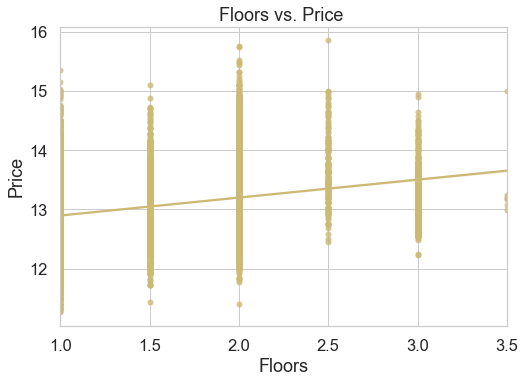

In [48]:
#Price vs Floors
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
sns.regplot(x= 'floors', y='price', data=KC, color="y").set_title('Floors vs. Price ')
plt.xlabel('Floors')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

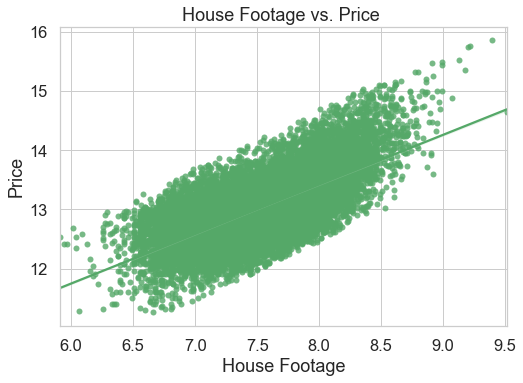

In [49]:
#Price vs sqft_living
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
sns.regplot(x= 'sqft_living', y='price', data=KC, color="g").set_title('House Footage vs. Price ')
plt.xlabel('House Footage')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

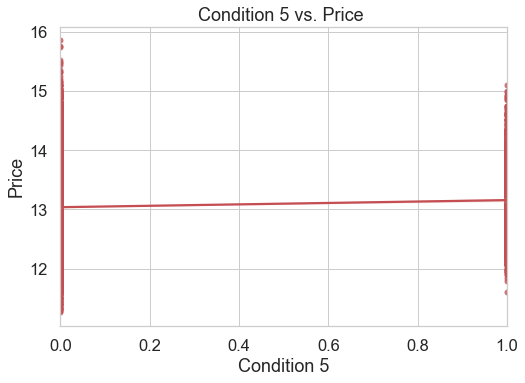

In [50]:
#Price vs Condition 5
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
sns.regplot(x= 'Cond_5', y='price', data=KC, color="r").set_title('Condition 5 vs. Price ')
plt.xlabel('Condition 5')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

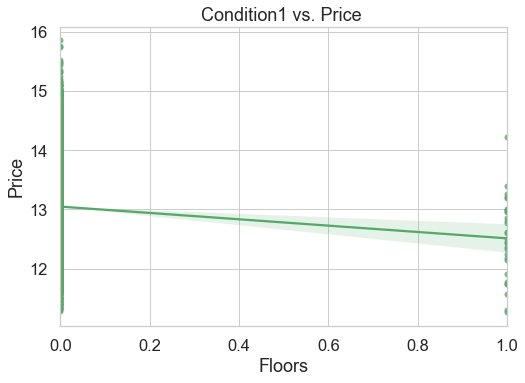

In [64]:
#Price vs Condition 1
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
sns.regplot(x= 'Cond_1', y='price', data=KC, color="g").set_title('Condition1 vs. Price ')
plt.xlabel('Floors')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

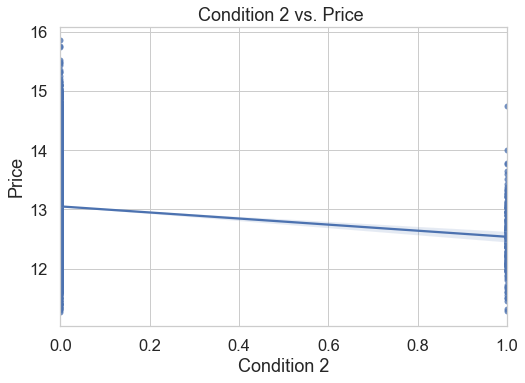

In [52]:
#Condition 2 vs Price
sns.set(style='whitegrid', palette="deep", font_scale=1.5)
sns.regplot(x= 'Cond_2', y='price', data=KC, color="b").set_title('Condition 2 vs. Price ')
plt.xlabel('Condition 2')
plt.ylabel('Price')

## Model Validation

Here we will train and split our data to see whether the model five will do well with different data with similar variables.
In this section we will compute the Mean Squared Error and the R squared of the training and testing data and make the necessary comparisons.

In [54]:
#Defining the x variables and the y variables

x=KC[['bedrooms','floors','sqft_living','Cond_2','Cond_1','Cond_5']]

y=KC['price'].values


In [55]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [56]:
# Train test split
x_train,x_test,y_train,y_test= train_test_split(x,y)


In [57]:
train,test= train_test_split(KC)

In [58]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [59]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(16197, 6) (16197,) (5400, 6) (5400,)


In [60]:
y_pred_test=model_five.predict(x_test)
y_pred_train=model_five.predict(x_train)


In [61]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mse,test_mse

(0.14283312295303627, 0.14545139170614174)

In [65]:
train_rmse=train_mse**0.5
test_rmse=test_mse**0.5
train_rmse, test_rmse

(0.37793269632705273, 0.3813809010767867)

In [62]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_r2,test_r2

(0.4792667692627215, 0.4915989099622008)

The Mean Squared Errors and Root Mean Squared Error of the train and test data do not differ greatly from each other meaning that model five can efficiently be used to predict house prices. The r squared values are also quite similar. Therefore this means that model five will perform similarly when used on new data with similar variables.

## Findings

As mentioned earlier, model five is our suitable model.

In [63]:
#Coefficients.
model_five.params

Intercept      6.239897
bedrooms      -0.302182
floors         0.072056
sqft_living    0.933022
Cond_2        -0.172667
Cond_5         0.166435
Cond_1        -0.123624
dtype: float64

The findings here are that ```floors```, ```sqft_living``` and ```Cond_5``` have a positive impact on the house prices. A unit increase in the square footage of the home leads to an increase in house price by 93%. This is actually a very big effect on the prices. Therefore, the larger the living space the higher the house price.
For floors, an increase in floors by 1 leads to an increase in house price by 7.2%. The more the foors, the higher the price.
Having a house in the best condition which is condition 5 leads to an increase in the price by 16.6%. This is as expected.

On the contrary, ```bedrooms```, ```Cond_2``` and ```Cond_2``` have an inverse relationship with ```price```. One would expect that an increase in bedrooms would lead to an increase in price. However, the results show that an increase in the number of bedrooms leads to a decrease in house prices by 30%. Houses being in condition one and condition 2 which are the two worst condition lead to decrease in house prices by 12% and 17% respectively.

## Recommendations.

* For house sellers to reap the most out of their sales, they should increase the number of floors in the houses. They should also considerincreasing the footage of the home as such houses sell at better prices.
* House sellers should also make sure the houses they sell are in the best condition which is condition 5. This way they make the more profits.
* House buyers should plan their budget according to the specifications they would love. They should put into consideration that houses that have a larger footage, more floors and in the best condition are more expensive and may require them to save more or acquire financing to purchase. However there are  cheaper houses but they are not in the best condition. Therefore to get the best houses, house buyers should consider saving more or getting mortgages from financial institutions.



## Conclusion

From the Kings County dataset and analysis it is clear that  the better the house features the higher their prices. Therefore, the real estate agency can properly advice homesellers on how to better their business and home buyers depending on their financial capacity.